<a href="https://colab.research.google.com/github/LolaSM/TFG_Bio/blob/main/Modelo3_TFG_Biom%C3%A9dica_Lola_speed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load and Visualization of Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the patients data that includes a vector per patient with statistics information: mean, desviation, kurtosis, skewness

In [2]:
url = 'https://raw.githubusercontent.com/LolaSM/TFG_Bio/refs/heads/main/tablaVectores_AB_speed.csv'
patients_vector = pd.read_csv(url)

In [ ]:
patients_vector.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patient    87 non-null     int64  
 1   group      87 non-null     object 
 2   mediaVelX  87 non-null     float64
 3   mediaVelY  87 non-null     float64
 4   mediaVelZ  87 non-null     float64
 5   stdVelX    87 non-null     float64
 6   stdVelY    87 non-null     float64
 7   stdVelZ    87 non-null     float64
 8   kurVelX    87 non-null     float64
 9   kurVelY    87 non-null     float64
 10  kurVelZ    87 non-null     float64
 11  skwVelX    87 non-null     float64
 12  skwVelY    87 non-null     float64
 13  skwVelZ    87 non-null     float64
dtypes: float64(12), int64(1), object(1)
memory usage: 9.6+ KB


Each group (A:pain-free (0), B:pain-affected (1)) will be represented by an integer

In [3]:
from sklearn.preprocessing import LabelEncoder

# Encode labels
le = LabelEncoder()
patients_vector['group'] = le.fit_transform(patients_vector['group'])

patients_vector.info(())

patients_vector['group'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patient    87 non-null     int64  
 1   group      87 non-null     int64  
 2   mediaVelX  87 non-null     float64
 3   mediaVelY  87 non-null     float64
 4   mediaVelZ  87 non-null     float64
 5   stdVelX    87 non-null     float64
 6   stdVelY    87 non-null     float64
 7   stdVelZ    87 non-null     float64
 8   kurVelX    87 non-null     float64
 9   kurVelY    87 non-null     float64
 10  kurVelZ    87 non-null     float64
 11  skwVelX    87 non-null     float64
 12  skwVelY    87 non-null     float64
 13  skwVelZ    87 non-null     float64
dtypes: float64(12), int64(2)
memory usage: 9.6 KB


,count
group,
1,44
0,43


Calculate some statistics on the numerical attributes of the data set

In [ ]:
patients_vector.describe()

,patient,group,mediaVelX,mediaVelY,mediaVelZ,stdVelX,stdVelY,stdVelZ,kurVelX,kurVelY,kurVelZ,skwVelX,skwVelY,skwVelZ
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,44.000000,0.505747,-0.000868,0.001894,-0.001370,0.586197,0.517355,0.504159,19.522935,38.612974,17.868057,0.007458,0.453973,0.300465
std,25.258662,0.502865,0.002460,0.001515,0.002154,0.130806,0.128533,0.112862,8.803427,20.340611,4.166817,0.704271,1.083214,0.538055
min,1.000000,0.000000,-0.008422,-0.000259,-0.006426,0.243122,0.215913,0.240660,11.606137,18.167542,9.852058,-1.564811,-1.290536,-1.077397
25%,22.500000,0.000000,-0.002280,0.000750,-0.002578,0.500099,0.442547,0.422066,14.611097,27.889036,14.745164,-0.357311,-0.176265,0.014595
50%,44.000000,1.000000,-0.000631,0.001529,-0.001455,0.588742,0.522637,0.486019,17.391072,33.064938,17.462042,0.029387,0.364571,0.359392
75%,65.500000,1.000000,0.000664,0.002663,-0.000244,0.671084,0.580089,0.572934,21.233659,42.989719,19.920898,0.414670,0.926021,0.615773
max,87.000000,1.000000,0.003749,0.006510,0.006746,0.966623,0.960599,0.754982,80.387739,153.618886,33.026972,3.202772,5.126692,1.652645


Take a quick look to de distribution of the data

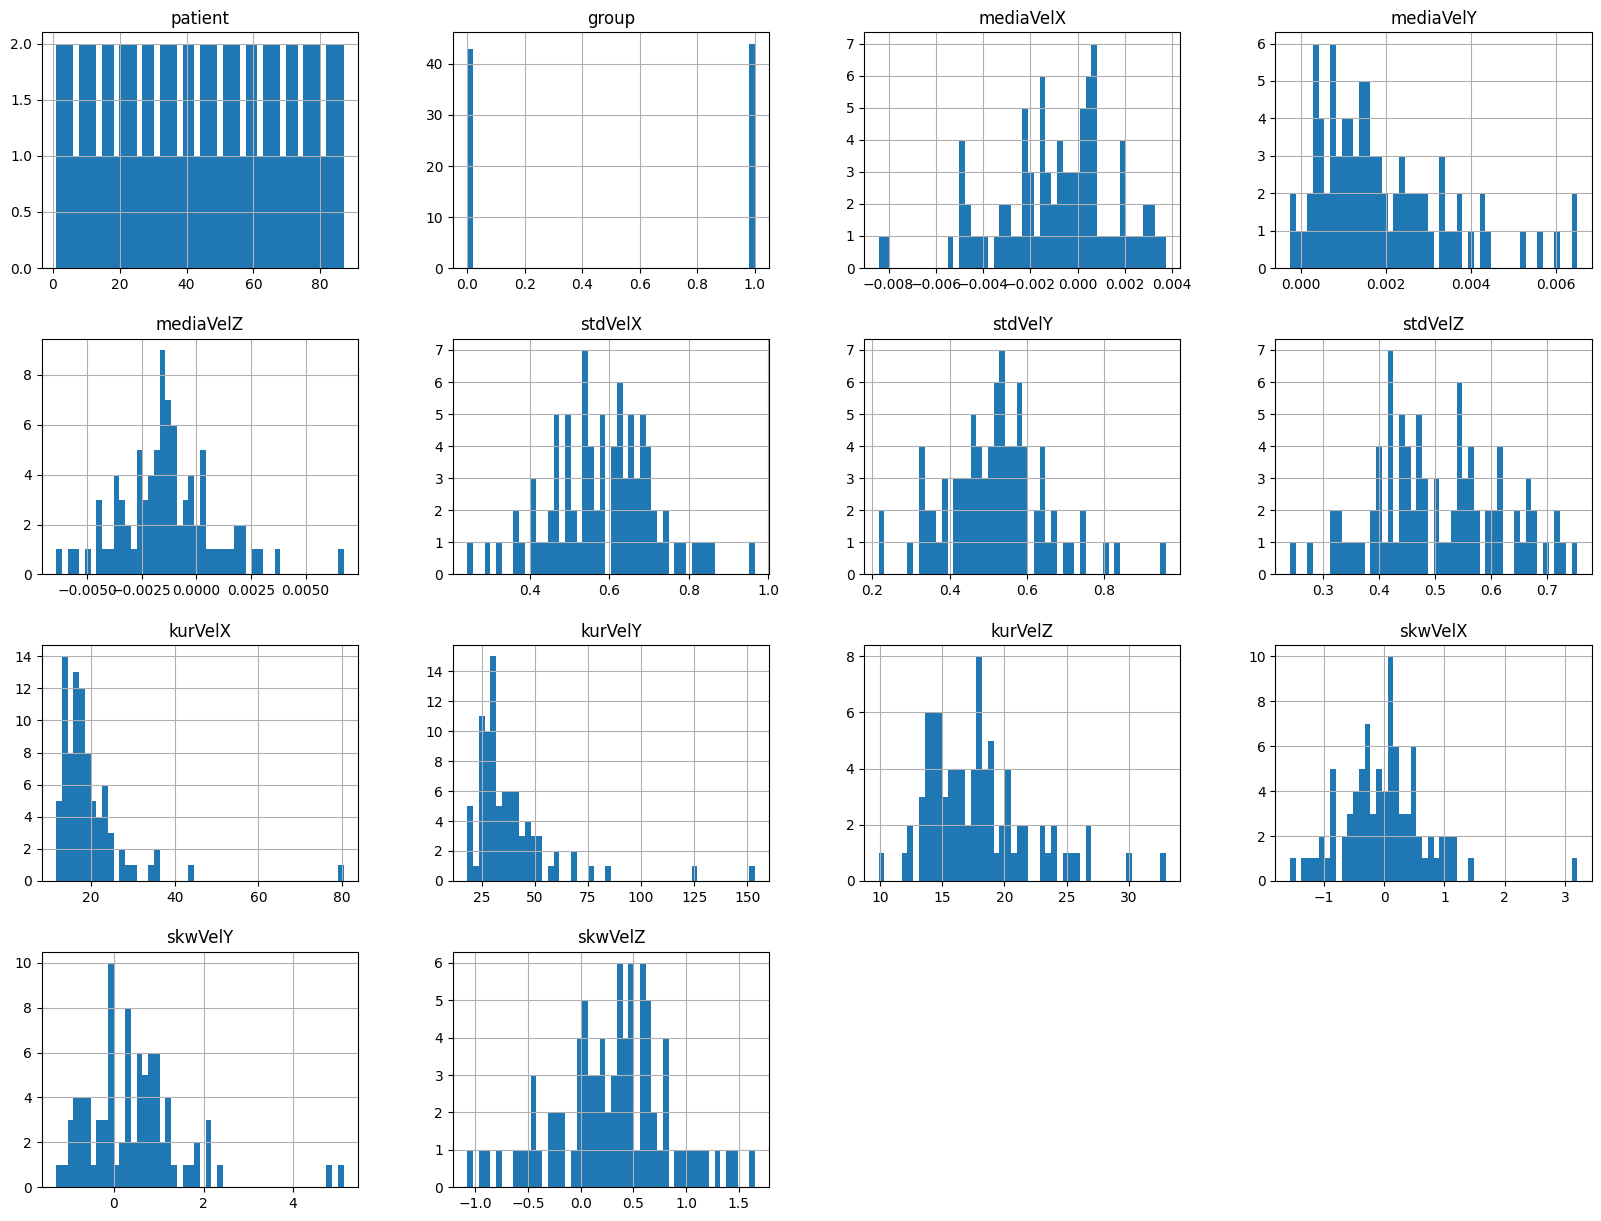

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
patients_vector.hist(bins=50, figsize=(20,15))
plt.show()

Distribution of the features according to the group

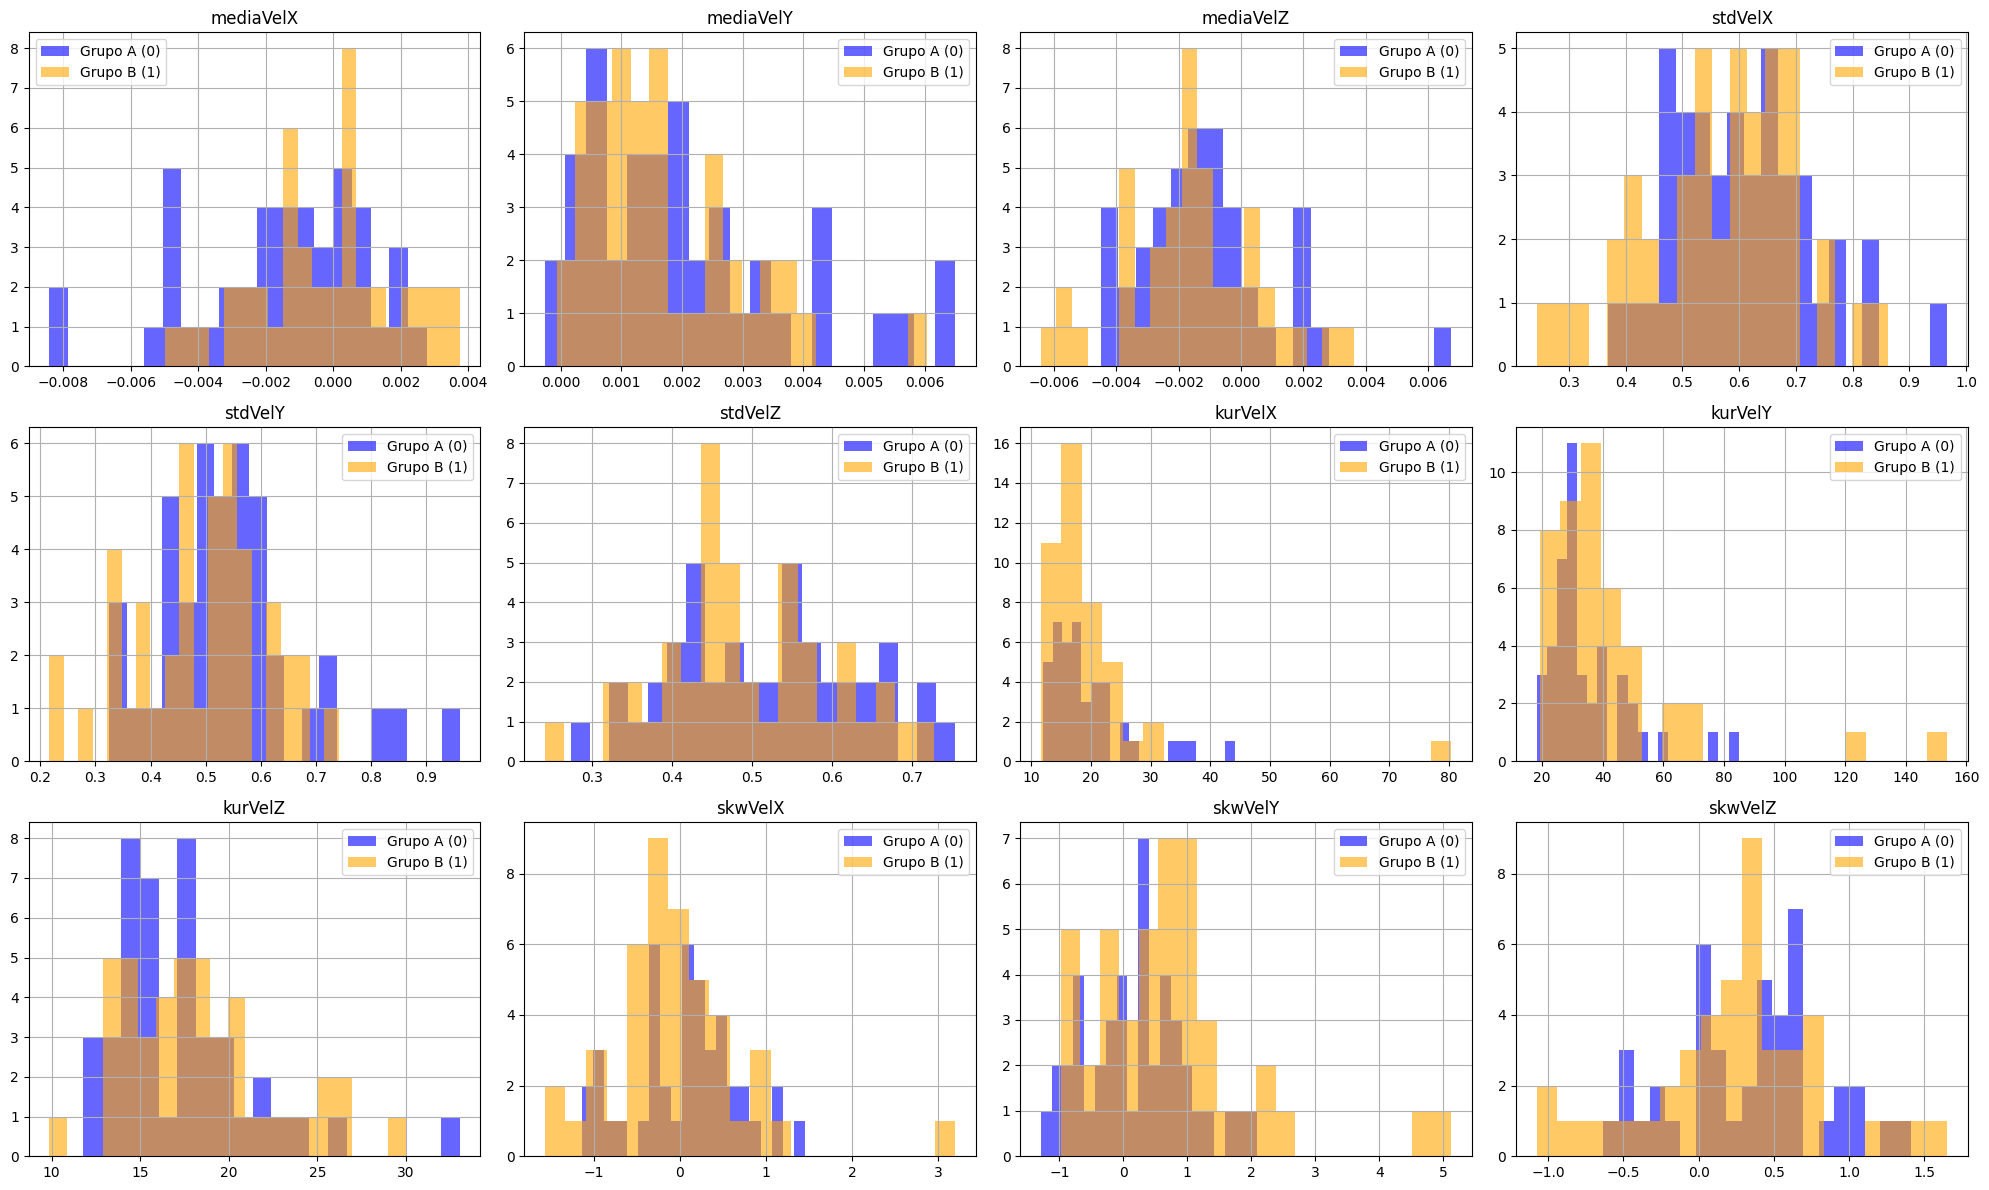

In [ ]:
import matplotlib.pyplot as plt

# Filtra los grupos
grupo_a = patients_vector[patients_vector["group"] == 0]
grupo_b = patients_vector[patients_vector["group"] == 1]

# Lista de características (sin 'patient' ni 'group')
features = patients_vector.drop(columns=["patient", "group"]).columns

# Tamaño del gráfico
n_cols = 4
n_rows = (len(features) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))

# Aplanar axes en caso de que sea 2D
axes = axes.flatten()

# Generar histogramas superpuestos
for i, feature in enumerate(features):
    ax = axes[i]
    grupo_a[feature].hist(ax=ax, bins=20, alpha=0.6, color="blue", label="Grupo A (0)")
    grupo_b[feature].hist(ax=ax, bins=20, alpha=0.6, color="orange", label="Grupo B (1)")
    ax.set_title(feature)
    ax.legend()

# Quitar subplots vacíos si hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Exploring correlation

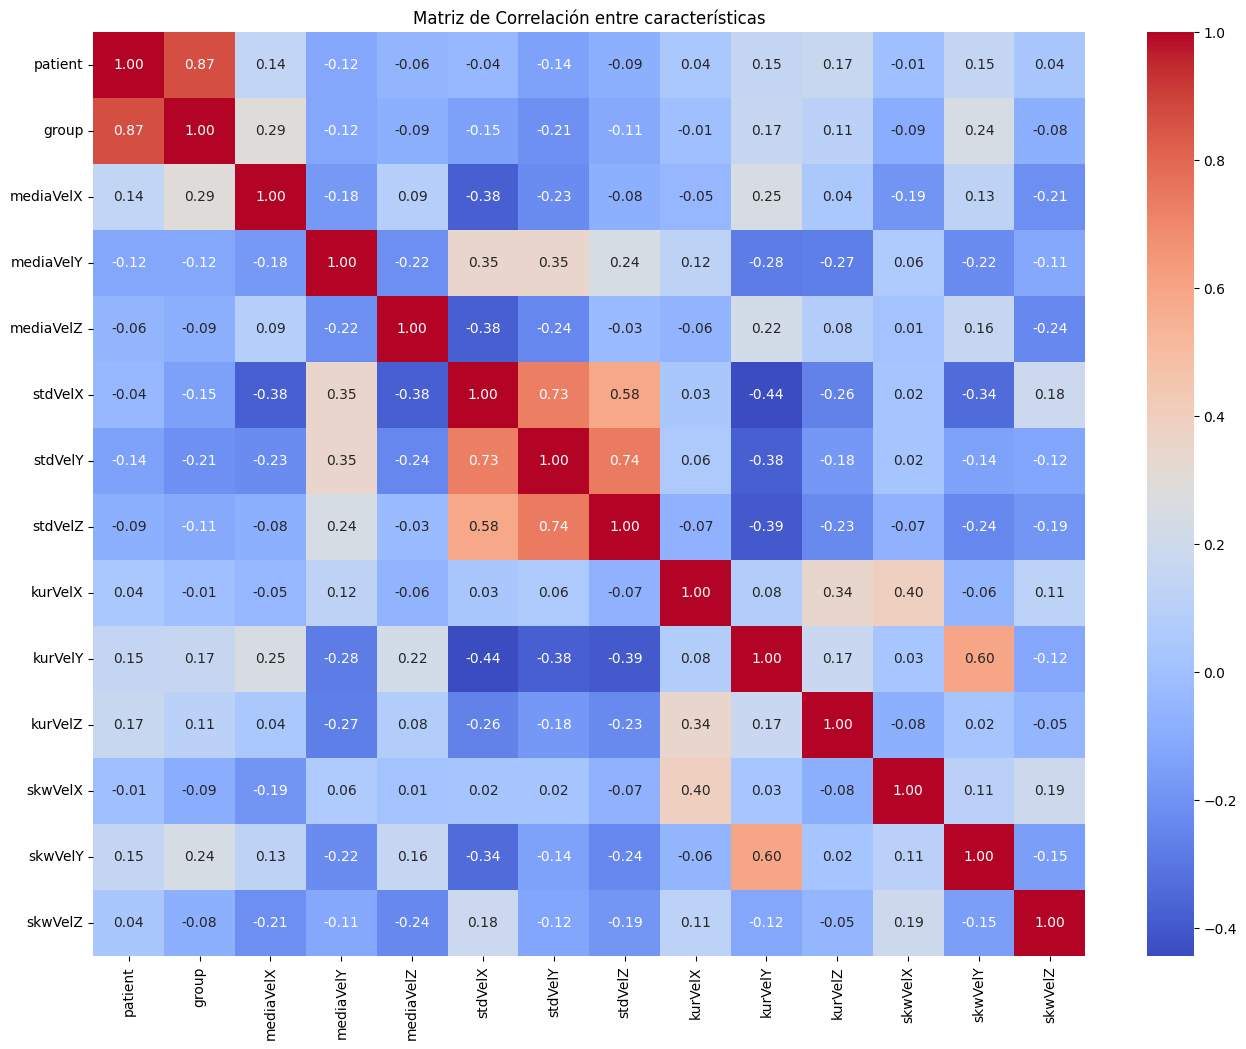

In [ ]:
corr_matrix = patients_vector.corr()
import seaborn as sns
# Dibujar el heatmap
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlación entre características")
plt.show()

Most correlated features StdVel

#Random Forest

In [4]:
# Delete columns not necessaary for the model
df = patients_vector.drop(columns=["patient"])  # 'patient' es solo un identificador

# Separate features from tags of the group
X = df.drop("group", axis=1)
y = df["group"]

Division of the dataset into:
*  80% training
*  20% test

**Stratified sampling** to produce sets that contain a representative ratio of each class.

First, I **separate the test set** as I will use it once at the end of the process.

In [5]:
from sklearn.model_selection import train_test_split

# First separate test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

**Training using Cross-Validation**
*   Division of the data in 10 parts by defect(cv=10)
*   n_estimators=100
*   max_depth=10
*   random_state=42

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

random_forest_clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5, #10 or 15 are good options as well
    random_state=42, #seed
)

# Cross-validation
scores = cross_val_score(random_forest_clf, X_train, y_train, cv=10, scoring='accuracy')

# Show the accuracy obtained in each fold
print("Accuracy in each fold:", scores)

# Calculate and display the average accuracy value and standard deviation for the scores of each fold
print(f"Accuracy medio en CV: {scores.mean():.3f}")
print(f"Desviación estándar en CV: {scores.std():.3f}")

Accuracy in each fold: [0.14285714 0.57142857 0.28571429 0.42857143 0.28571429 0.28571429
 0.71428571 0.71428571 0.42857143 0.16666667]
Accuracy medio en CV: 0.402
Desviación estándar en CV: 0.197


Analysis of the **importance of the features**

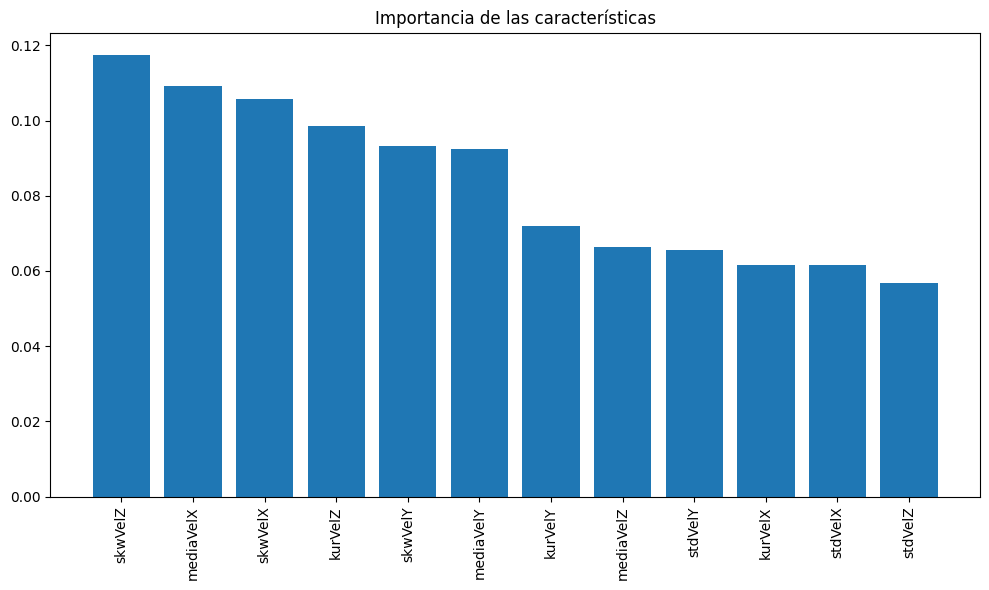

In [ ]:
random_forest_clf.fit(X_train, y_train)

importances = random_forest_clf.feature_importances_
feature_names = X.columns

import matplotlib.pyplot as plt
import numpy as np

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,6))
plt.title("Importancia de las características")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

**Final Evaluation using Test Set**

Confusion Matrix and Accuracy

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix


# Prediction for the test set
y_pred_rf = random_forest_clf.predict(X_test)
# Cuando debería emplear cross_val_predict y sobre qué lo tendría que hacer, sobre el test o el training? Cuando no haga separación entre test y training, sobre todo el data
#y_pred = cross_val_predict(random_forest_clf, X, y, cv=10)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion matrix:")
print(cm)

# Calculate the accuracy of the model
accuracy = np.mean(y_pred_rf == y_test)
print("Accuracy:", accuracy)


Confusion matrix:
[[6 3]
 [4 5]]
Accuracy: 0.6111111111111112


No aprende nada el modelo ni predice bien

# Multilayer perceptron for classification

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

# Crear MLP con dos capas ocultas de 30 neuronas cada una
mlp = mlp_pipeline = make_pipeline(
    StandardScaler(),
    MLPClassifier(hidden_layer_sizes=(30, 30), max_iter=10000, random_state=42)
)
# Validación cruzada
scores = cross_val_score(mlp, X, y, cv=10)
print("Accuracy in each fold:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())

# Predicciones para obtener matriz de confusión y métricas
y_pred_mlp = cross_val_predict(mlp, X, y, cv=10)
print("\nMatriz de confusión:")
print(confusion_matrix(y, y_pred_mlp))

Accuracy in each fold: [0.55555556 0.55555556 0.66666667 0.22222222 0.55555556 0.33333333
 0.44444444 0.25       0.75       0.5       ]
Mean accuracy: 0.4833333333333333
Standard deviation: 0.1634882107729129

Matriz de confusión:
[[19 24]
 [21 23]]


#Logistic Regression

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# --- Escalado + Logistic Regression ---
logreg_pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=42, max_iter=1000)  # max_iter ↑ para asegurar convergencia
)

# --- Validación cruzada ---
scores = cross_val_score(logreg_pipeline, X, y, cv=10)
print("Accuracy in each fold:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())

# --- Predicciones para matriz de confusión ---
y_pred_lr = cross_val_predict(logreg_pipeline, X, y, cv=10)
print("\nMatriz de confusión:")
print(confusion_matrix(y, y_pred_lr))

Accuracy in each fold: [0.66666667 0.66666667 0.66666667 0.44444444 0.55555556 0.55555556
 0.33333333 0.5        0.625      0.375     ]
Mean accuracy: 0.538888888888889
Standard deviation: 0.11683189358229494

Matriz de confusión:
[[22 21]
 [19 25]]


#SVM using LinearSVC

In [ ]:
from sklearn.svm import LinearSVC

scaler = StandardScaler()
X_scaled_SVM = scaler.fit_transform(X)

svm_clf = LinearSVC(dual='auto', random_state=42)

scores = cross_val_score(svm_clf, X_scaled_SVM, y, cv=10, scoring='accuracy')
print("Accuracy in each fold:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())

Accuracy in each fold: [0.66666667 0.66666667 0.66666667 0.44444444 0.55555556 0.55555556
 0.33333333 0.5        0.5        0.375     ]
Mean accuracy: 0.5263888888888889
Standard deviation: 0.1135920929477352


This is the highest accuracy for the moment, could it be better?

#Red neuronal 1

In [6]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Input
import tensorflow as tf

#Sets all random seeds (Python, NumPy, and TF)
tf.keras.utils.set_random_seed(42)

model = Sequential([
    Input(shape=(12,)),
    Dense(50, activation='relu'),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

Training the model

Plot the losses and accuracies of each epoch

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.3742 - loss: 0.7239 - val_accuracy: 0.4286 - val_loss: 0.7559
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4617 - loss: 0.6670 - val_accuracy: 0.5714 - val_loss: 0.7565
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5627 - loss: 0.6477 - val_accuracy: 0.5000 - val_loss: 0.7557
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5340 - loss: 0.6381 - val_accuracy: 0.5714 - val_loss: 0.7491
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5690 - loss: 0.6297 - val_accuracy: 0.5714 - val_loss: 0.7426
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6598 - loss: 0.6210 - val_accuracy: 0.5000 - val_loss: 0.7410
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6598 - loss: 0.6140 - val_accuracy: 0.4286 - val_loss: 0.7415
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6552 - loss: 0.6097 - val_accuracy: 0.5000 - val_loss:

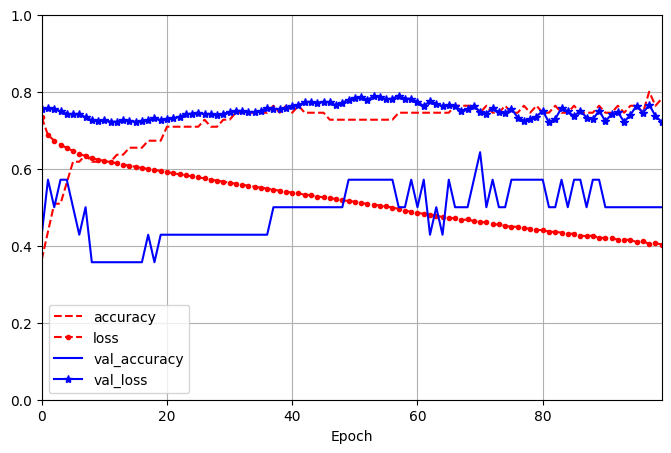

In [7]:
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.2)

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 99], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")
plt.show()

In [8]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.3f}")

model.summary()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6667 - loss: 0.5416
Test accuracy: 0.667


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,755 (38.11 KB)

 Trainable params: 3,251 (12.70 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,504 (25.41 KB)

**OVERFITTING**. Voy añadir escalado, early stopping y reducir el numero de capas y de neuronas

#Red Neuronal 2

He reducido los "recursos" para tener un modelo más sencillo, de menos capas y neuronas.

También he añadido escalado y early stopping para que se detenga el entrenamiento cuando la red deje de mejorar en validación

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.5800 - loss: 0.7143 - val_accuracy: 0.5000 - val_loss: 0.7274
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6228 - loss: 0.6957 - val_accuracy: 0.5000 - val_loss: 0.7245
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6228 - loss: 0.6826 - val_accuracy: 0.5000 - val_loss: 0.7225
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6228 - loss: 0.6708 - val_accuracy: 0.5000 - val_loss: 0.7208
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6560 - loss: 0.6599 - val_accuracy: 0.4286 - val_loss: 0.7190
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6560 - loss: 0.6497 - val_accuracy: 0.5000 - val_loss: 0.7174
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6560 - loss: 0.6400 - val_accuracy: 0.5000 - val_loss: 0.7159
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6702 - loss: 0.6308 - val_accuracy: 0.5000 - val_loss:

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 20)             │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 845 (3.30 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 564 (2.21 KB)

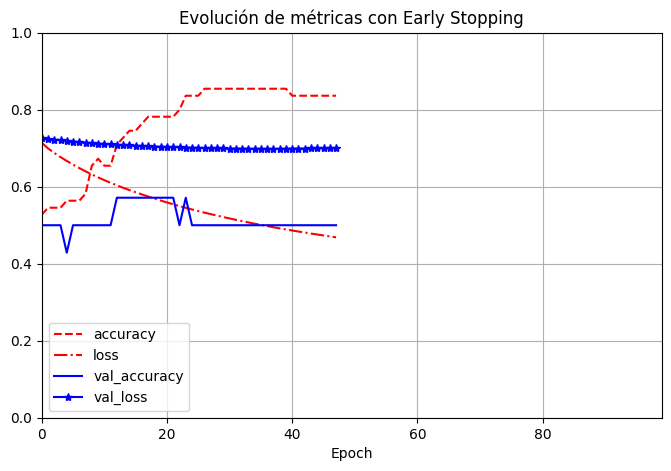

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
tf.keras.utils.set_random_seed(42)

# Escalado
scaler = StandardScaler()
X_train_redneuronal2 = scaler.fit_transform(X_train)
X_test_redneuronal2 = scaler.transform(X_test)

model2 = Sequential([
    Input(shape=(12,)),
    Dense(20, activation='relu'),
    Dense(1, activation='sigmoid')
])

model2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor='val_loss',        # métrica que se monitoriza
    patience=10,               # número de epochs sin mejora antes de detener
    restore_best_weights=True # recupera los mejores pesos al final
)

history = model2.fit(
    X_train_redneuronal2, y_train,
    epochs=100,
    batch_size=8,
    validation_split=0.2,
    callbacks=[early_stop]
)

loss, accuracy = model2.evaluate(X_test_redneuronal2, y_test)
print(f"Test accuracy: {accuracy:.3f}")

model2.summary()

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 99], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r-.", "b-", "b-*"]
)
plt.title("Evolución de métricas con Early Stopping")
plt.legend(loc="lower left")
plt.show()

##Red Neuronal 3

Voy a aplicar validación cruzada con 5 pliegues


=== Fold 1 ===
Fold 1 validation accuracy: 0.444

=== Fold 2 ===
Fold 2 validation accuracy: 0.500

=== Fold 3 ===
Fold 3 validation accuracy: 0.588

=== Fold 4 ===
Fold 4 validation accuracy: 0.706

=== Fold 5 ===
Fold 5 validation accuracy: 0.647

=== Cross-validation Results ===
Mean validation accuracy: 0.577
Standard deviation of validation accuracy: 0.095


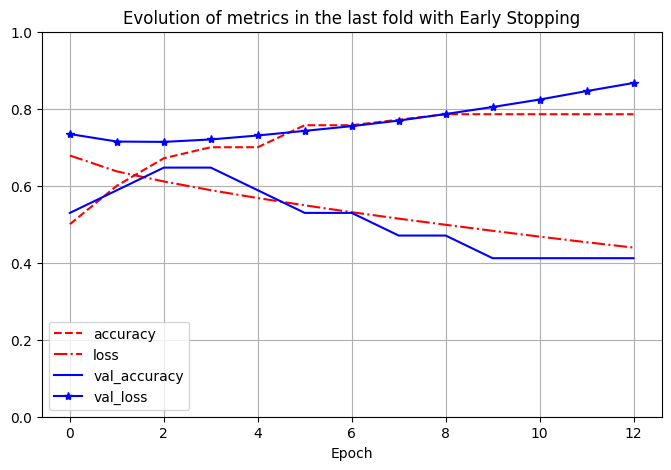

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# Set seed for reproducibility
tf.keras.utils.set_random_seed(42)

# Prepare for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []
histories = [] # Optional: to store history of each fold

# Loop through each fold
for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
    print(f"\n=== Fold {fold} ===")

    # Split data for the current fold
    # Use .iloc to select rows by numerical index
    X_train_fold, X_val_fold = X.iloc[train_idx].values, X.iloc[val_idx].values
    y_train_fold, y_val_fold = y.iloc[train_idx].values, y.iloc[val_idx].values

    # Scale data for the current fold
    # IMPORTANT: Create a new scaler for each fold to prevent data leakage
    scaler = StandardScaler()
    X_train_scaled_fold = scaler.fit_transform(X_train_fold)
    X_val_scaled_fold = scaler.transform(X_val_fold)

    # Create the model for the current fold (architecture of Red Neuronal 1)
    # IMPORTANT: Create a new model for each fold
    model_cv1 = Sequential([
        Input(shape=(X.shape[1],)), # Use X.shape[1] for the number of features
        Dense(50, activation='relu'),
        Dense(50, activation='relu'),
        Dense(1, activation='sigmoid') # Sigmoid for binary classification
    ])

    # Compile the model
    model_cv1.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    # Early stopping for the current fold
    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10, # Number of epochs with no improvement
        restore_best_weights=True # Restore best weights
    )

    # Train the model for the current fold
    # Use validation_data parameter instead of validation_split
    history_fold = model_cv1.fit(
        X_train_scaled_fold, y_train_fold,
        epochs=100,
        batch_size=8,
        validation_data=(X_val_scaled_fold, y_val_fold), # Use validation data for the fold
        callbacks=[early_stop],
        verbose=0 # Set to 1 to see training progress
    )

    # Evaluate the model on the validation data of the current fold
    loss, acc = model_cv1.evaluate(X_val_scaled_fold, y_val_fold, verbose=0)
    print(f"Fold {fold} validation accuracy: {acc:.3f}")
    accuracies.append(acc)
    histories.append(history_fold.history) # Store history

# Display cross-validation results
print("\n=== Cross-validation Results ===")
print(f"Mean validation accuracy: {np.mean(accuracies):.3f}")
print(f"Standard deviation of validation accuracy: {np.std(accuracies):.3f}")

# Optional: Plot training history of the last fold
if histories:
    pd.DataFrame(histories[-1]).plot(
        figsize=(8, 5), ylim=[0, 1], grid=True, xlabel="Epoch",
        style=["r--", "r-.", "b-", "b-*"]
    )
    plt.title("Evolution of metrics in the last fold with Early Stopping")
    plt.legend(loc="lower left")
    plt.show()

##Red Neuronal 4

Voy a añadirle regularización para ver si mejora


=== Red Neuronal 4 - Fold 1 ===
Red Neuronal 4 - Fold 1 validation accuracy: 0.611

=== Red Neuronal 4 - Fold 2 ===
Red Neuronal 4 - Fold 2 validation accuracy: 0.444

=== Red Neuronal 4 - Fold 3 ===
Red Neuronal 4 - Fold 3 validation accuracy: 0.706

=== Red Neuronal 4 - Fold 4 ===
Red Neuronal 4 - Fold 4 validation accuracy: 0.353

=== Red Neuronal 4 - Fold 5 ===
Red Neuronal 4 - Fold 5 validation accuracy: 0.706

=== Red Neuronal 4 - Cross-validation Results ===
Mean validation accuracy: 0.564
Standard deviation of validation accuracy: 0.142


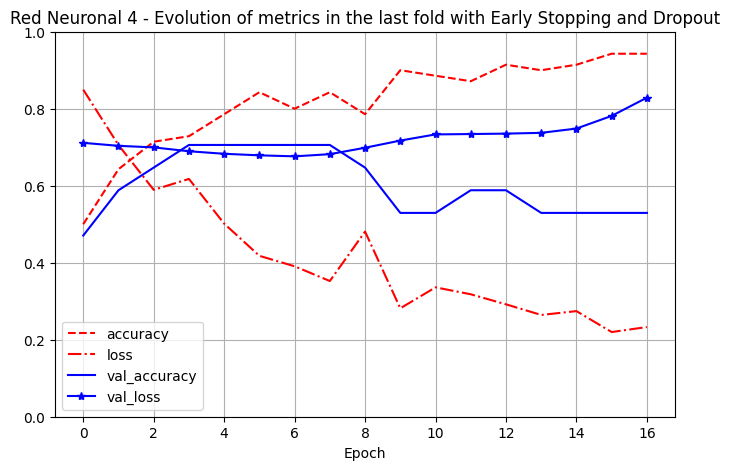

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout # Importar Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
import kerastuner as kt

# Set seed for reproducibility
tf.keras.utils.set_random_seed(42)

# Prepare for cross-validation for Red Neuronal 4
skf_rn4 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies_rn4 = []
histories_rn4 = [] # Optional: to store history of each fold

# Loop through each fold for Red Neuronal 4
for fold_rn4, (train_idx_rn4, val_idx_rn4) in enumerate(skf_rn4.split(X, y), 1):
    print(f"\n=== Red Neuronal 4 - Fold {fold_rn4} ===")

    # Split data for the current fold
    X_train_fold_rn4, X_val_fold_rn4 = X.iloc[train_idx_rn4].values, X.iloc[val_idx_rn4].values
    y_train_fold_rn4, y_val_fold_rn4 = y.iloc[train_idx_rn4].values, y.iloc[val_idx_rn4].values

    # Scale data for the current fold
    scaler_rn4 = StandardScaler()
    X_train_scaled_fold_rn4 = scaler_rn4.fit_transform(X_train_fold_rn4)
    X_val_scaled_fold_rn4 = scaler_rn4.transform(X_val_fold_rn4)

    # Create the model for the current fold (Architecture with Dropout)
    #model_rn4 = Sequential([
     #   Input(shape=(X.shape[1],)),
      #  Dense(50, activation='relu'),
       # Dropout(0.3), # Añadir una capa Dropout después de la primera capa Dense
        #Dense(50, activation='relu'),
        #Dropout(0.3), # Añadir otra capa Dropout después de la segunda capa Dense
        #Dense(1, activation='sigmoid') # Sigmoid for binary classification
    #])
    #model_rn4 = Sequential([
    #Input(shape=(X.shape[1],)),
    #Dense(128, activation='relu', kernel_regularizer=l2(1e-4)),
    #BatchNormalization(),
    #Dropout(0.2),
    #Dense(64, activation='relu', kernel_regularizer=l2(1e-4)),
    #BatchNormalization(),
    #Dropout(0.2),
    #Dense(32, activation='relu', kernel_regularizer=l2(1e-4)),
    #BatchNormalization(),
    #Dropout(0.2),
    #Dense(1, activation='sigmoid')
    #])

    # Compile the model
    model_rn4.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    # Early stopping for the current fold
    early_stop_rn4 = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )

    # Train the model for the current fold
    history_fold_rn4 = model_rn4.fit(
        X_train_scaled_fold_rn4, y_train_fold_rn4,
        epochs=100,
        batch_size=8,
        validation_data=(X_val_scaled_fold_rn4, y_val_fold_rn4),
        callbacks=[early_stop_rn4],
        verbose=0 # Set to 1 to see training progress
    )

    # Evaluate the model on the validation data of the current fold
    loss_rn4, acc_rn4 = model_rn4.evaluate(X_val_scaled_fold_rn4, y_val_fold_rn4, verbose=0)
    print(f"Red Neuronal 4 - Fold {fold_rn4} validation accuracy: {acc_rn4:.3f}")
    accuracies_rn4.append(acc_rn4)
    histories_rn4.append(history_fold_rn4.history) # Store history

# Display cross-validation results for Red Neuronal 4
print("\n=== Red Neuronal 4 - Cross-validation Results ===")
print(f"Mean validation accuracy: {np.mean(accuracies_rn4):.3f}")
print(f"Standard deviation of validation accuracy: {np.std(accuracies_rn4):.3f}")

# Optional: Plot training history of the last fold for Red Neuronal 4
if histories_rn4:
    pd.DataFrame(histories_rn4[-1]).plot(
        figsize=(8, 5), ylim=[0, 1], grid=True, xlabel="Epoch",
        style=["r--", "r-.", "b-", "b-*"]
    )
    plt.title("Red Neuronal 4 - Evolution of metrics in the last fold with Early Stopping and Dropout")
    plt.legend(loc="lower left")
    plt.show()


##Red Neuronal 5


=== Red Neuronal 5 - Fold 1 ===
Red Neuronal 5 - Fold 1 validation accuracy: 0.444

=== Red Neuronal 5 - Fold 2 ===
Red Neuronal 5 - Fold 2 validation accuracy: 0.444

=== Red Neuronal 5 - Fold 3 ===
Red Neuronal 5 - Fold 3 validation accuracy: 0.333

=== Red Neuronal 5 - Fold 4 ===
Red Neuronal 5 - Fold 4 validation accuracy: 0.667

=== Red Neuronal 5 - Fold 5 ===
Red Neuronal 5 - Fold 5 validation accuracy: 0.333

=== Red Neuronal 5 - Fold 6 ===
Red Neuronal 5 - Fold 6 validation accuracy: 0.667

=== Red Neuronal 5 - Fold 7 ===
Red Neuronal 5 - Fold 7 validation accuracy: 0.444

=== Red Neuronal 5 - Fold 8 ===
Red Neuronal 5 - Fold 8 validation accuracy: 0.625

=== Red Neuronal 5 - Fold 9 ===
Red Neuronal 5 - Fold 9 validation accuracy: 0.500

=== Red Neuronal 5 - Fold 10 ===
Red Neuronal 5 - Fold 10 validation accuracy: 0.750

=== Red Neuronal 5 - Cross-validation Results ===
Mean validation accuracy: 0.521
Standard deviation of validation accuracy: 0.139


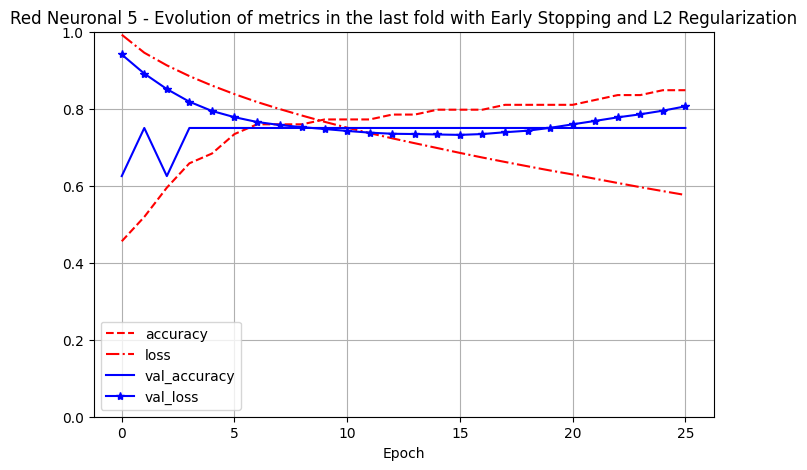

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2 # Importar regularizador L2
import tensorflow as tf

# Set seed for reproducibility
tf.keras.utils.set_random_seed(42)

# Prepare for cross-validation for Red Neuronal 5 (with L2 Regularization)
skf_rn5 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accuracies_rn5 = []
histories_rn5 = [] # Optional: to store history of each fold

# Loop through each fold for Red Neuronal 5
for fold_rn5, (train_idx_rn5, val_idx_rn5) in enumerate(skf_rn5.split(X, y), 1):
    print(f"\n=== Red Neuronal 5 - Fold {fold_rn5} ===")

    # Split data for the current fold
    X_train_fold_rn5, X_val_fold_rn5 = X.iloc[train_idx_rn5].values, X.iloc[val_idx_rn5].values
    y_train_fold_rn5, y_val_fold_rn5 = y.iloc[train_idx_rn5].values, y.iloc[val_idx_rn5].values

    # Scale data for the current fold
    scaler_rn5 = StandardScaler()
    X_train_scaled_fold_rn5 = scaler_rn5.fit_transform(X_train_fold_rn5)
    X_val_scaled_fold_rn5 = scaler_rn5.transform(X_val_fold_rn5)

    # Create the model for the current fold (Architecture with L2 Regularization)
    model_rn5 = Sequential([
        Input(shape=(X.shape[1],)),
        Dense(50, activation='relu', kernel_regularizer=l2(0.004)), # Añadir regularización L2
        Dense(50, activation='relu', kernel_regularizer=l2(0.004)), # Añadir regularización L2
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model_rn5.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    # Early stopping for the current fold
    early_stop_rn5 = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )

    # Train the model for the current fold
    history_fold_rn5 = model_rn5.fit(
        X_train_scaled_fold_rn5, y_train_fold_rn5,
        epochs=100,
        batch_size=8,
        validation_data=(X_val_scaled_fold_rn5, y_val_fold_rn5),
        callbacks=[early_stop_rn5],
        verbose=0 # Set to 1 to see training progress
    )

    # Evaluate the model on the validation data of the current fold
    loss_rn5, acc_rn5 = model_rn5.evaluate(X_val_scaled_fold_rn5, y_val_fold_rn5, verbose=0)
    print(f"Red Neuronal 5 - Fold {fold_rn5} validation accuracy: {acc_rn5:.3f}")
    accuracies_rn5.append(acc_rn5)
    histories_rn5.append(history_fold_rn5.history) # Store history

# Display cross-validation results for Red Neuronal 5
print("\n=== Red Neuronal 5 - Cross-validation Results ===")
print(f"Mean validation accuracy: {np.mean(accuracies_rn5):.3f}")
print(f"Standard deviation of validation accuracy: {np.std(accuracies_rn5):.3f}")

# Optional: Plot training history of the last fold for Red Neuronal 5
if histories_rn5:
    pd.DataFrame(histories_rn5[-1]).plot(
        figsize=(8, 5), ylim=[0, 1], grid=True, xlabel="Epoch",
        style=["r--", "r-.", "b-", "b-*"]
    )
    plt.title("Red Neuronal 5 - Evolution of metrics in the last fold with Early Stopping and L2 Regularization")
    plt.legend(loc="lower left")
    plt.show()


## Red Neuronal 7

Con PCA


=== Red Neuronal 7 - Testing PCA (n_components=10) with RN5 Architecture ===

=== Red Neuronal 7 - Fold 1 ===
Red Neuronal 7 - Fold 1 validation accuracy: 0.389

=== Red Neuronal 7 - Fold 2 ===
Red Neuronal 7 - Fold 2 validation accuracy: 0.556

=== Red Neuronal 7 - Fold 3 ===
Red Neuronal 7 - Fold 3 validation accuracy: 0.706

=== Red Neuronal 7 - Fold 4 ===
Red Neuronal 7 - Fold 4 validation accuracy: 0.647

=== Red Neuronal 7 - Fold 5 ===
Red Neuronal 7 - Fold 5 validation accuracy: 0.588

=== Red Neuronal 7 - Cross-validation Results ===
Mean validation accuracy: 0.577
Standard deviation of validation accuracy: 0.107


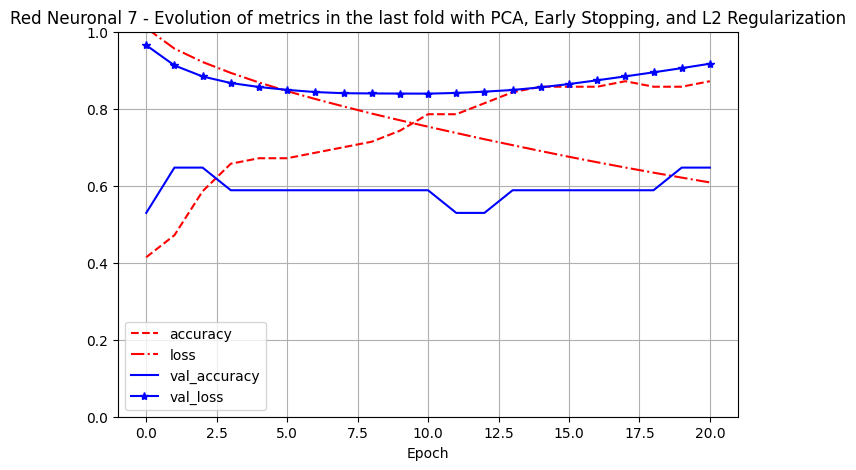

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA # Importar PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2 # Importar regularizador L2
import tensorflow as tf

# Set seed for reproducibility
tf.keras.utils.set_random_seed(42)

# Define the best L2 factor found from previous experiments
best_l2_factor_rn7 = 0.004

# Define the number of components for PCA for Red Neuronal 7
# Experiment with different values here
n_components_pca_rn7 = 10 # <--- CAMBIA ESTE VALOR EN CADA PRUEBA O USA UN PORCENTAJE (ej: 0.95)

print(f"\n=== Red Neuronal 7 - Testing PCA (n_components={n_components_pca_rn7}) with RN5 Architecture ===")

# Prepare for cross-validation for Red Neuronal 7
skf_rn7 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies_rn7 = []
histories_rn7 = [] # Optional: to store history

# Loop through each fold for Red Neuronal 7
for fold_rn7, (train_idx_rn7, val_idx_rn7) in enumerate(skf_rn7.split(X, y), 1):
    print(f"\n=== Red Neuronal 7 - Fold {fold_rn7} ===")

    # Split data for the current fold
    X_train_fold_rn7, X_val_fold_rn7 = X.iloc[train_idx_rn7].values, X.iloc[val_idx_rn7].values
    y_train_fold_rn7, y_val_fold_rn7 = y.iloc[train_idx_rn7].values, y.iloc[val_idx_rn7].values

    # --- Data Preprocessing Pipeline within the fold ---

    # 1. Scaling
    scaler_rn7 = StandardScaler()
    X_train_scaled_fold_rn7 = scaler_rn7.fit_transform(X_train_fold_rn7)
    X_val_scaled_fold_rn7 = scaler_rn7.transform(X_val_fold_rn7)

    # 2. PCA
    pca_rn7 = PCA(n_components=n_components_pca_rn7) # Initialize PCA for the fold
    X_train_pca_fold_rn7 = pca_rn7.fit_transform(X_train_scaled_fold_rn7) # Fit and transform on training data
    X_val_pca_fold_rn7 = pca_rn7.transform(X_val_scaled_fold_rn7) # Transform validation data

    # --- Keras Model (Red Neuronal 5 Architecture) ---
    # Input shape is now the number of components from PCA
    model_rn7 = Sequential([
        Input(shape=(n_components_pca_rn7,)), # Input shape is the number of PCA components
        Dense(50, activation='relu', kernel_regularizer=l2(best_l2_factor_rn7)),
        Dense(50, activation='relu', kernel_regularizer=l2(best_l2_factor_rn7)),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model_rn7.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    # Early stopping for the current fold
    early_stop_rn7 = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )

    # Train the model for the current fold
    history_fold_rn7 = model_rn7.fit(
        X_train_pca_fold_rn7, y_train_fold_rn7,
        epochs=100,
        batch_size=8,
        validation_data=(X_val_pca_fold_rn7, y_val_fold_rn7),
        callbacks=[early_stop_rn7],
        verbose=0
    )

    # Evaluate the model
    loss_rn7, acc_rn7 = model_rn7.evaluate(X_val_pca_fold_rn7, y_val_fold_rn7, verbose=0)
    print(f"Red Neuronal 7 - Fold {fold_rn7} validation accuracy: {acc_rn7:.3f}")
    accuracies_rn7.append(acc_rn7)
    histories_rn7.append(history_fold_rn7.history) # Store history

# Display cross-validation results for Red Neuronal 7
print("\n=== Red Neuronal 7 - Cross-validation Results ===")
print(f"Mean validation accuracy: {np.mean(accuracies_rn7):.3f}")
print(f"Standard deviation of validation accuracy: {np.std(accuracies_rn7):.3f}")

# Optional: Plot training history of the last fold
if histories_rn7:
    pd.DataFrame(histories_rn7[-1]).plot(
        figsize=(8, 5), ylim=[0, 1], grid=True, xlabel="Epoch",
        style=["r--", "r-.", "b-", "b-*"]
    )
    plt.title("Red Neuronal 7 - Evolution of metrics in the last fold with PCA, Early Stopping, and L2 Regularization")
    plt.legend(loc="lower left")
    plt.show()

##Red Neuronal RandomSearch

In [29]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.7 MB/s eta 0:00:00


In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt


# 3. Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# 4. Fijar semilla
tf.random.set_seed(42)
np.random.seed(42)

# 5. Definición de la función de modelo para el tuner
def build_model(hp):
    model = keras.Sequential()
    # Capa de entrada
    model.add(keras.Input(shape=(X_train_scaled.shape[1],)))

    # Número de capas ocultas entre 2 y 4
    for i in range(hp.Int("n_layers", 2, 4)):
        # Neuronas entre 32 y 256 paso 32
        units = hp.Int(f"units_{i}", min_value=32, max_value=256, step=32)
        # Regularización L2: elegir entre 1e-3, 1e-4, 1e-5
        l2 = hp.Choice(f"l2_{i}", [1e-3, 1e-4, 1e-5])
        model.add(keras.layers.Dense(units,
                                     activation="relu",
                                     kernel_regularizer=keras.regularizers.l2(l2)))
        # Dropout entre 0.1 y 0.5
        model.add(keras.layers.Dropout(rate=hp.Float(f"dropout_{i}", 0.1, 0.5, step=0.1)))

    # Capa de salida
    model.add(keras.layers.Dense(1, activation="sigmoid"))

    # Elegir optimizador
    optimizer = hp.Choice("optimizer", ["adam", "nadam", "rmsprop"])
    # Learning rate inicial
    lr = hp.Float("learning_rate", 1e-4, 1e-2, sampling="log")

    if optimizer == "adam":
        opt = keras.optimizers.Adam(learning_rate=lr)
    elif optimizer == "nadam":
        opt = keras.optimizers.Nadam(learning_rate=lr)
    else:
        opt = keras.optimizers.RMSprop(learning_rate=lr)

    model.compile(
        optimizer=opt,
        loss="binary_crossentropy",
        metrics=["accuracy", keras.metrics.AUC(name="auc")]
    )
    return model

# 6. Configuración del Random Search
tuner = kt.RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=20,               # número de configuraciones a probar
    executions_per_trial=2,      # reentrena cada configuración 2 veces para promediar
    directory="tuner_rn4",
    project_name="red_neuronal_4"
)

# 7. Callbacks para early stopping y reducción de LR
early_stop = keras.callbacks.EarlyStopping(
    monitor="val_accuracy", patience=8, restore_best_weights=True
)
reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss", factor=0.5, patience=5, min_lr=1e-6
)

# 8. Lanzar la búsqueda
tuner.search(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=8,
    validation_split=0.2,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# 9. Mejor modelo
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Mejores hiperparámetros encontrados:")
for param in best_hp.values:
    print(f"  {param}: {best_hp.get(param)}")

best_model = tuner.get_best_models(num_models=1)[0]

# 10. Evaluación en test final
loss, acc, auc = best_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nTest accuracy: {acc:.3f}, Test AUC: {auc:.3f}")


Trial 20 Complete [00h 00m 28s]
val_accuracy: 0.6071428656578064

Best val_accuracy So Far: 0.7857142686843872
Total elapsed time: 00h 08m 04s
Mejores hiperparámetros encontrados:
  n_layers: 4
  units_0: 32
  l2_0: 1e-05
  dropout_0: 0.2
  units_1: 192
  l2_1: 0.0001
  dropout_1: 0.30000000000000004
  optimizer: adam
  learning_rate: 0.00045104052720017446
  units_2: 256
  l2_2: 0.001
  dropout_2: 0.5
  units_3: 32
  l2_3: 0.001
  dropout_3: 0.1


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))



Test accuracy: 0.667, Test AUC: 0.630


In [32]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.callbacks import EarlyStopping

# --- 1) Recuperar los mejores hiperparámetros del tuner ---
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

# --- 2) Función para construir el modelo con best_hp ---
def build_best_model(input_dim):
    m = keras.Sequential()
    m.add(keras.Input(shape=(input_dim,)))
    # Use the number of layers found by the tuner
    for i in range(best_hp.get("n_layers")):
        units = best_hp.get(f"units_{i}")
        l2_reg = best_hp.get(f"l2_{i}") # Corrected to use l2_{i}
        m.add(layers.Dense(units,
                           activation="relu",
                           kernel_regularizer=regularizers.l2(l2_reg)))
        # Add dropout based on tuner results
        dropout_rate = best_hp.get(f"dropout_{i}") # Corrected to use dropout_{i}
        m.add(layers.Dropout(rate=dropout_rate))

    m.add(layers.Dense(1, activation="sigmoid"))

    # Optimizer y lr
    opt_name = best_hp.get("optimizer")
    lr       = best_hp.get("learning_rate")
    if opt_name == "adam":
        opt = keras.optimizers.Adam(learning_rate=lr)
    elif opt_name == "nadam":
        opt = keras.optimizers.Nadam(learning_rate=lr)
    else:
        opt = keras.optimizers.RMSprop(learning_rate=lr)

    m.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["accuracy"])
    return m

# --- 3) Preparamos el StratifiedKFold sobre TODO el train ---
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []

# Convert X_train and y_train to numpy arrays for indexing
X_train_np = X_train.values
y_train_np = y_train.values

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_np, y_train_np), 1):
    # Particionar - use numpy arrays
    X_tr, X_val = X_train_np[train_idx], X_train_np[val_idx]
    y_tr, y_val = y_train_np[train_idx], y_train_np[val_idx]

    # Escalado dentro del fold
    scaler = StandardScaler().fit(X_tr)
    X_tr_s  = scaler.transform(X_tr)
    X_val_s = scaler.transform(X_val)

    # Nueva instancia del modelo
    model_cv = build_best_model(input_dim=X_train_np.shape[1])

    # Early Stopping
    es = EarlyStopping(monitor="val_loss",
                       patience=10,
                       restore_best_weights=True)

    # Entrenar
    model_cv.fit(
        X_tr_s, y_tr,
        validation_data=(X_val_s, y_val),
        epochs=100,
        batch_size=8,
        callbacks=[es],
        verbose=0
    )

    # Evaluar en el fold
    _, acc = model_cv.evaluate(X_val_s, y_val, verbose=0)
    print(f"Fold {fold} accuracy: {acc:.3f}")
    cv_scores.append(acc)

# --- 4) Resultados ---
print(f"\nMean CV accuracy: {np.mean(cv_scores):.3f} ± {np.std(cv_scores):.3f}")

Fold 1 accuracy: 0.786
Fold 2 accuracy: 0.429
Fold 3 accuracy: 0.500
Fold 4 accuracy: 0.643
Fold 5 accuracy: 0.692

Mean CV accuracy: 0.610 ± 0.129
